# The Effect of News Media and White House Sentiment on the Stock Market

#### Group 22 Julia Hoffman, Nikhil Pereira, Ryan Weiss
hjulia99@vt.edu, nikhil24@vt.edu, ryanw99@vt.edu

## Problem Statement

The gatekeepers of American information should be selective in what they say to the public, because their words can have a significant impact on the economy. Fluctuations in the stock market are common after certain articles and tweets reach Wall Street and the general public. While key information is sometimes the cause of these changes in the market, it's often the sentiment that has the most profound impact, and this can be carefully crafted through specific language. With social media, including Twitter, having grown tremendously over the past decade, the effect of tweets on the direction of the market has simultaenously grown, and now is a crucial time to study these effects.

Additionally, with the COVID-19 situation being so new, there is not much research on how different sentiment has affected the stock market during this pandemic. Looking at those tweets have the largest effect on indexes like the DOW Jones Index and the S&P 500 is important in determining economic influence. This involves not only individuals like the president, but news organizations like Fox News, CNN, and MSCNB. Further, an analysis of these tweets and headlines can help influential people and organizations determine what language tends to have positive or negative effects on the market, providing useful guidance for future crises.

## Project Description

This project will analyze the relationship between how the White House and the media portray COVID-19 updates and the stock market. Because these sources are the gatekeepers of information to the American people, they have a significant impact on the economy. Currently, Twitter is the #1 news app on the app store, suggesting that this cite is where many citizens obtain their information. Tweets will be gathered and analyzed from Donald Trump, CNN, FoxNews, and MSNBC for sentiment. In addition, data from the DOW Jones Index and the S&P 500 will be used to track the stock market. This is a significant project because if successful, it can inform the American public about how negative or positive headlines could be directly effecting their livelihood. It will also suggest to gatekeepers to think twice about their sentiment before publishing a Tweet.

## Driving Research Questions

What is the effect of the White House and media sentiment on the stock market? Which gatekeeper has the larger effect on the stock market (S&P 500 and DOW Jones)? How should the American public and investors respond to news from each of the gatekeepers in the future? Is one gatekeeper causing more damage to the US Economy than others?

## Data Gathering and Processing

#### Detailed Description of Data
Data is collected from yahoo finance and Twitter to later be analyzed for a relationship between news media/White House sentiment and the stock market. The python module yfinance is used to obtain the opening and closing price of the DOW Jones Index and the S&P 500 Index. We plan to focus our analysis on 10 days prior to the crash and 10 days post crash in March 2020.The DOW and S&P charts show evidence that there was a steep crash in March 2020. As for the Twitter data, tweepy is used to access tweets from Trump, CNN, Fox News, and MSNBC. Six csvs are going to be generated, two for financial data and four for each Twitter user.

In [ ]:
pip install yfinance

In [ ]:
pip install yahoofinancials

(<matplotlib.axes._subplots.AxesSubplot at 0x1ad685ff780>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1ad696bb438>)

ValueError: Image size of 2599264x525 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 432x288 with 1 Axes>

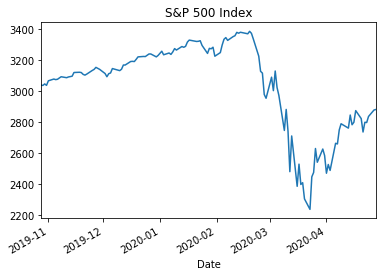

In [4]:
# Importing API to access stock data 
import pandas as pd
import yfinance as yf
import yahoofinancials
import matplotlib.pyplot as plt

# Collecting DOW Jones data from the date of the first COVID-19 case 
dow_financials = yahoofinancials.YahooFinancials('DJIA')
dowdata = dow_financials.get_historical_price_data(start_date='2019-11-17', 
                                                  end_date='2020-04-19', 
                                                  time_interval='daily')
# Outputing data into a dataframe and CSV
dow_df = pd.DataFrame(dowdata['DJIA']['prices'])
dow_df.to_csv('ProjectData/dowdata.csv', index=False)

# Creating plot of historical dow jones data 
plot1 = plt.figure()
ticker = yf.Ticker('DJI')
dow_df = ticker.history(period = "6mo")
plot1 = dow_df['Close'].plot(title="DOW Jones Index")


# Collecting S&P 500 data from the date of the first COVID-19 case
sp_financials = yahoofinancials.YahooFinancials('^GSPC')
spdata = sp_financials.get_historical_price_data(start_date='2019-11-17', 
                                                  end_date='2020-04-19', 
                                                  time_interval='daily')

# Outputing data into a dataframe and CSV
sp_df = pd.DataFrame(spdata['^GSPC']['prices'])
sp_df.to_csv('ProjectData/spdata.csv', index=False)

# Creating plot of historical s&p 500 data
plot2 = plt.figure()
ticker2 = yf.Ticker('^GSPC')
sp_df = ticker2.history(period = "6mo")
plot2 = sp_df['Close'].plot(title="S&P 500 Index")

x = 10000
y = 20
plot1.annotate("Crash", (x,y), xytext=(1,1),
               bbox=dict(), arrowprops=dict(facecolor='red'))  #Add the label for Montgomery County Va
(plot1, plot2)


In [3]:
# Importing API to access Twitter data 
import pandas as pd
import tweepy
import json
import pandas

# Function to read the key file and load keys in a dictionary
def loadKeys(key_file):
    with open('keys.json') as f:
        key_dict = json.load(f)
    return key_dict['api_key'], key_dict['api_secret'], key_dict['token'], key_dict['token_secret']

# Authenticate using oAuthHandler
KEY_FILE = 'keys2.json'
api_key, api_secret, token, token_secret = loadKeys(KEY_FILE)
auth = tweepy.OAuthHandler(api_key, api_secret)
auth.set_access_token(token, token_secret)
api = tweepy.API(auth)

# Function to Get User Data from All Twitter Users

In [4]:
from collections import defaultdict #Import a dictionary data structure to parse the twitter object Record Set

def get_user_data(username, numiterations,countTweet): #Function takes in the user number of tweets to 
    dataframe = pandas.DataFrame() #Create an empty dataframe
    user_tweets = api.user_timeline(username, count = countTweet, exclude_replies = True, include_rts = False) #Call the Twttier API
    user_dict = defaultdict(list) #Create an empty dictionary
    lastTweet = user_tweets[-1] #Retrieve the last ID in the Record Set
    newID = lastTweet.id #Store the last tweets ID
    for i in range(numiterations): #Iterate n times to gather previous timeline data of user
        tweets = api.user_timeline(username, count = countTweet, max_id=newID, exclude_replies = True, include_rts = False) #Call API with the last ID from previous timeline
        for tweet in tweets: #Store the data from the API in a dictionary
            user_dict["Date"].append(tweet.created_at)
            user_dict["text"].append(tweet.text)
            user_dict["ID"].append(tweet.id)
            user_dict["Username"].append(username)
        userdf = pd.DataFrame(user_dict) #Convert the dictionary to a dataframe
        frame = pandas.concat([dataframe,userdf]) #Make a frame that concats the first set of data to the current frame userdf
        newID = str(userdf.iloc[-1, :]['ID']) #Update the newID variable
    return frame #return the frame


# Call the Function with the Twitter User News Platform

In [5]:
FoxFrame = get_user_data('FoxNews',2,125) #Retreiving FoxNews Data
FoxFrame

,Date,text,ID,Username
0,2020-04-09 22:15:21,https://t.co/192Q8J0rCw,1248373963501137929,FoxNews
1,2020-04-09 19:26:06,https://t.co/dnjbvXzUcv,1248331370683916294,FoxNews
2,2020-04-09 17:59:19,https://t.co/fB4IhSiodE,1248309531077152776,FoxNews
3,2020-04-09 17:51:24,https://t.co/JcRzDwZWzS,1248307537721556993,FoxNews
4,2020-04-09 13:10:33,https://t.co/PwqG5BZilb,1248236862948474880,FoxNews
5,2020-04-09 12:39:35,https://t.co/vs9u1ilGeA,1248229069101154309,FoxNews
6,2020-04-09 02:27:02,https://t.co/so4hyHLumz,1248074915548364806,FoxNews
7,2020-04-09 01:25:03,https://t.co/YNqeyAB621,1248059316164321285,FoxNews
8,2020-04-09 00:50:39,https://t.co/gd5pfcNkp7,1248050657929637889,FoxNews
9,2020-04-08 23:55:59,https://t.co/ULZFh2QkM5,1248036903003271169,FoxNews


In [6]:
CNNFrame = get_user_data('CNN',13,1000) #Retreiving CNN News Data
CNNFrame

,Date,text,ID,Username
0,2020-04-21 20:19:47,Chef and restaurant owner Matt Louis had been ...,1252693536639791104,CNN
1,2020-04-21 20:10:09,"""I did not like that. That was pretty deep in ...",1252691113036533760,CNN
2,2020-04-21 20:06:50,"Albany, Georgia, Mayor Bo Dorough on Gov. Bria...",1252690276742660096,CNN
3,2020-04-21 20:04:21,Here's what's in the new small business relief...,1252689653486047239,CNN
4,2020-04-21 19:57:27,Congressional negotiators have reached a deal ...,1252687916826066950,CNN
5,2020-04-21 19:50:10,"""I spent 9 days in a medically induced coma, o...",1252686080597467136,CNN
6,2020-04-21 19:34:06,The hottest club on TV wants you to be a VIP f...,1252682038936842241,CNN
7,2020-04-21 19:32:42,The story of how two San Francisco mayors — on...,1252681685759594500,CNN
8,2020-04-21 19:24:06,"“We have seen some improvements, but reopening...",1252679524279410688,CNN
9,2020-04-21 19:17:29,Along for the ride with the astronauts on the ...,1252677857836400649,CNN


In [7]:
MSNBCFrame = get_user_data('MSNBC',5,100) #Retreiving MSNBC Data

In [8]:
TrumpFrame = get_user_data('realDonaldTrump',10,1000) #Retreiving Trump Data
TrumpFrame

,Date,text,ID,Username
0,2020-04-15 15:48:05,"My condolences to the Steinbrenner family, and...",1250450832937684992,realDonaldTrump
1,2020-04-15 15:39:58,#ThanksForDelivering @UPS! https://t.co/4Sis7T...,1250448788386439168,realDonaldTrump
2,2020-04-15 15:37:20,"Our GREAT Senator from South Carolina, @Senato...",1250448126835675139,realDonaldTrump
3,2020-04-15 00:45:11,“The Art of an Oil Deal” https://t.co/UyH5pYTmYw,1250223610867986432,realDonaldTrump
4,2020-04-14 23:25:07,https://t.co/KRxBA0OjpX,1250203462555570176,realDonaldTrump
5,2020-04-14 21:21:24,White House news conference today at 5:45 P.M....,1250172326920040449,realDonaldTrump
6,2020-04-14 15:49:52,My Administration is committed to protecting t...,1250088893766078470,realDonaldTrump
7,2020-04-14 14:57:19,Tell the Democrat Governors that “Mutiny On Th...,1250075668282576898,realDonaldTrump
8,2020-04-14 14:24:51,"GET RID OF BALLOT HARVESTING, IT IS RAMPANT WI...",1250067500190089217,realDonaldTrump
9,2020-04-14 14:07:11,"Cuomo’s been calling daily, even hourly, beggi...",1250063051182747651,realDonaldTrump


# Sample Sentiment Analysis on CNN Data to show project path

This is a sample 20 recent Tweets from CNN and we did a quick VADER sentiment analysis to show the direction of the project. This is a quick demonstration on how we will be doing Sentiment analysis on Twitter User Data before and after the stock market crash

In [38]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib
import matplotlib.pyplot as plt
import numpy

#read the file into dataframe. "header=0" means the first row will be considered as a header
##****** Make a dictionary and determine the data types correctly
frame = pd.read_csv("./Cnndata.csv", header=0, dtype={'date':str,"text":str,'id':str, 'Username':str})
analyzer = SentimentIntensityAnalyzer() #Store the sentiment variable
sentimentDict = defaultdict(list)
headframe = frame.head(20)
for sentence in headframe.text: #Compute the scores for each sentence in frame
    vs = analyzer.polarity_scores(sentence)
    sentimentDict["Negative Score"].append(vs['neg'])
    sentimentDict["Neutral Score"].append(vs['neu'])
    sentimentDict["Positive Score"].append(vs['pos'])
    sentimentDict["Compound Score"].append(vs['compound'])
frame2 = pd.DataFrame(sentimentDict)
userData = pd.concat([frame, frame2], axis=1, sort=False).drop(['Unnamed: 0','ID'],axis=1).iloc[0:20,:] #Concat the numeric and non-numeric data into one frame
score = userData.mean()
print(score)
userData

Negative Score    0.07555
Neutral Score     0.87090
Positive Score    0.05360
Compound Score   -0.07269
dtype: float64


,Date,text,Username,Negative Score,Neutral Score,Positive Score,Compound Score
0,2020-04-19 17:15:08,A senior UK government figure defends Prime Mi...,CNN,0.000,1.000,0.000,0.0000
1,2020-04-19 17:00:03,Mass testing is ongoing at the three facilitie...,CNN,0.202,0.798,0.000,-0.5106
2,2020-04-19 16:45:03,"Treasury Secretary Steven Mnuchin says ""we are...",CNN,0.000,0.921,0.079,0.2023
3,2020-04-19 16:30:03,Several countries hit by new waves of infectio...,CNN,0.118,0.882,0.000,-0.3400
4,2020-04-19 16:15:06,"President Trump says he took ""strong action"" i...",CNN,0.090,0.776,0.135,0.2732
5,2020-04-19 16:00:14,"Their identities are fracturing in isolation, ...",CNN,0.218,0.627,0.155,-0.1779
6,2020-04-19 15:48:09,Republican and Democratic officials push back ...,CNN,0.000,1.000,0.000,0.0000
7,2020-04-19 15:35:01,President Trump's coronavirus briefing was lit...,CNN,0.000,1.000,0.000,0.0000
8,2020-04-19 15:14:05,"Madeleine Albright, former US Secretary of Sta...",CNN,0.000,0.853,0.147,0.4767
9,2020-04-19 15:00:17,The baby of a pregnant nurse who died of Covid...,CNN,0.233,0.677,0.090,-0.5868


# Save All Frames to CSV

In [85]:
FoxFrame.to_csv('ProjectData/FoxData.csv')
CNNFrame.to_csv('ProjectData/CnnData.csv')
MSNBCFrame.to_csv('ProjectData/MSNBCData.csv')
TrumpFrame.to_csv('ProjectData/TrumpTwitterData.csv')

# Credit Listing

Problem Statement: Ryan

Project Description: Nikhil

Driving Research Questions: Julia

Data Gathering and Processing: Julia and Nikhil